# Задание

### Основная часть

* Попробовать построить графики из тех, что были на уроке по Seaborn и Matplotlib
* Важно чтобы у каждого из графиков был как минимум один в комментариях или markdown

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [3]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [17]:
## Линейные графики
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

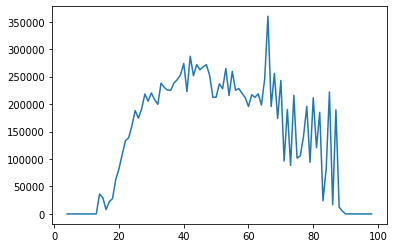

In [25]:
# кол-во трат по картам от возраста
df_mean = df[['age', 'dc_trx_sum']].groupby('age').mean()
df_mean.head()
plt.plot(df_mean.dc_trx_sum)
plt.show()
## траты растут быстро в возрасте от 18 до 35 лет, затем стабилизируются и сохраняют примерно одинаковый уровень до 60 лет
## максимальные траты совершаются в возрасте около 65 лет
## после 65 летвозмодны крупные траты по необходимости (путешествия, здоровье)  

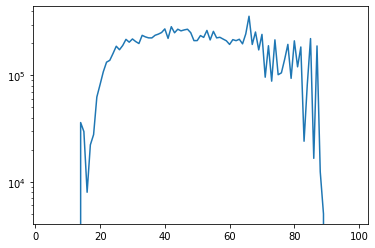

In [27]:
plt.plot(df_mean.dc_trx_sum)
plt.yscale(value='log')
plt.show()

C:\Users\max_i\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\max_i\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


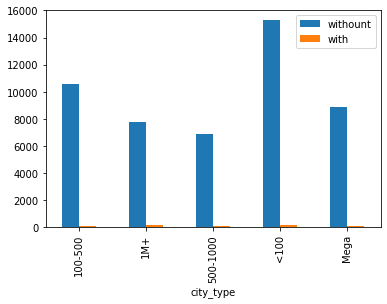

In [51]:
# Столбчатая диаграмма
df_tmp2 = df[['city_type','ml_balance']] 
df_tmp2['withount'] = df_tmp2.ml_balance.apply(lambda X: 1 if X == 0 else 0)
df_tmp2['with'] = df_tmp2.ml_balance.apply(lambda X: 1 if X > 0 else 0)
#.groupby('city_type').count()
df_tmp2 = df_tmp2.groupby('city_type').sum()
# df_tmp2
df_tmp2.drop('ml_balance',axis=1, inplace=True)
df_tmp2.plot(kind='bar')
plt.show()

#количественное соотношение людей с ипотекой и без ипотеки, получилось не очень показательно, поэтому построила ниже долю

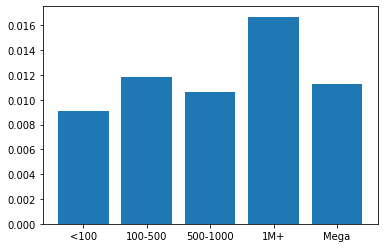

In [66]:
df_tmp2['part'] = df_tmp2.eval( df_tmp2['with'] / (df_tmp2['with'] + df_tmp2['withount']))
# df_tmp2
d = df_tmp2.to_dict()['part']
n = ['<100', '100-500', '500-1000', '1M+', 'Mega']
a = [d[i] for i in n]
plt.bar(n, a)
plt.show()

# доля людей с наличием ипотеки максимальна в городах миллионниках

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

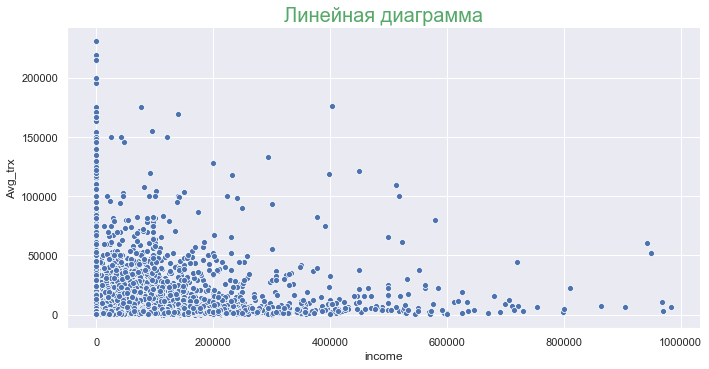

In [93]:
# df_3 = df[['income', 'Avg_trx']]
df_3 = df[df.Avg_trx.notnull()]
df_3
sns.set(style='darkgrid')  

sns.relplot(
    x='income', 
    y='Avg_trx', 
    data=df_3.query("income < 1000000").query("Avg_trx < 500000"), 
    kind='scatter',
    aspect=2
)
plt.title('Линейная диаграмма', size=20, color='g');

## больше всего транзакций у людей с низким доходом

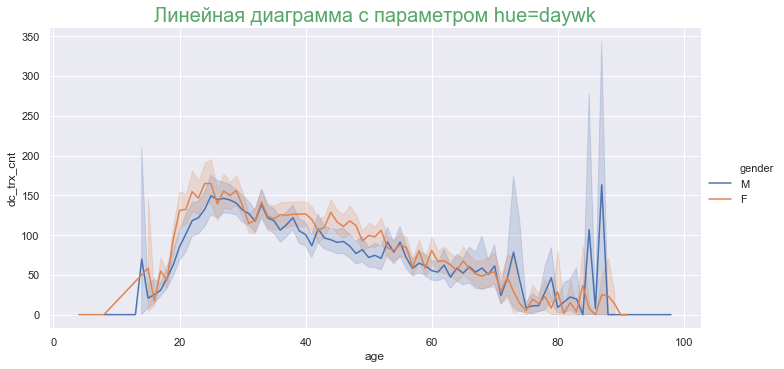

In [97]:
df_4 = df[df.gender.notnull()]

gender = ['М', 'F']
sns.relplot(
    x='age', 
    y='dc_trx_cnt', 
    hue='gender', 
    hue_order=gender,
    aspect=2,
    data=df_4, kind='line')
plt.title('Линейная диаграмма с параметром hue=daywk', size=20, color='g');

# женщины делают больше транзакций, чем мужчины, за исключением пенсии)))

In [146]:
labels_5 = ['Kids', 'Young', 'Adult', 'Elderly']

df5 = df[['age', 'dc_trx_sum','income']]
df5['q1'] = pd.qcut(df5['age'],
                              q=[0, .15, .35, .8, 1],
                              labels=labels_5)
# df5#.head()

C:\Users\max_i\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


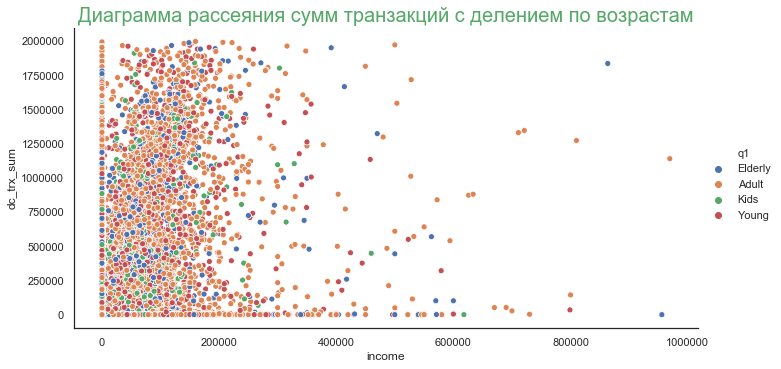

In [145]:
sns.relplot(
    x='income',
    y='dc_trx_sum',
    hue='q1',
    data=df5.query('income < 1000000').query('dc_trx_sum < 2000000'),
    aspect = 2
)

plt.title('Диаграмма рассеяния сумм транзакций с делением по возрастам', size=20, color='g');

Text(0.5, 1, 'Распределение по сумме транзакций у 4 возрастных групп по типу города')

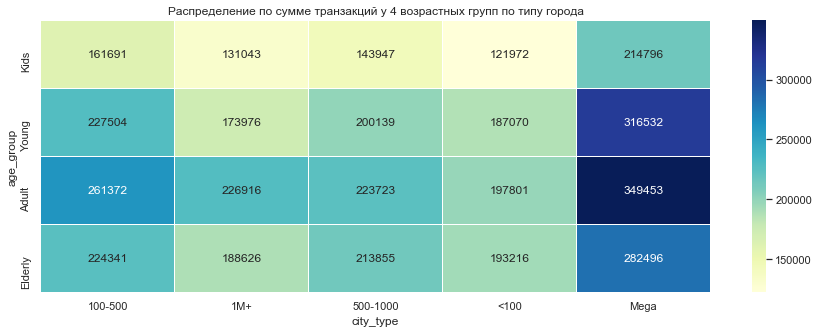

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')
df['age_group']= pd.qcut(df['age'],
                              q=[0, .15, .35, .8, 1],
                              labels=labels_5)

# Подготовим данные в сводной таблицы по кварталам в строчку и по продуктам в колонках
sales = pd.DataFrame(df.groupby(["age_group", "city_type"]).dc_trx_sum.mean())
sales = sales.reset_index()
sales = sales.pivot('age_group', 'city_type','dc_trx_sum')
sales.head()

fig, (ax1) = plt.subplots(1, figsize=(15,5))

sns.heatmap(
    sales, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu", 
    ax=ax1)
ax1.set_title('Распределение по сумме транзакций у 4 возрастных групп по типу города')

# больше всего суммы транзакций у взрослых людей (30-55 лет) 
# в мегаполисах суммы транзакций больше чем в городах другого типа 
# самые маленькие траты у делей (0-15 лет) в маленьких городах 